# Seeds dataset (Clustering)

## Authors

Written by: Neeraj Asthana (under Professor Robert Brunner)

University of Illinois at Urbana-Champaign

Summer 2016

## Acknowledgements

Dataset found on UCI Machine Learning repository at: https://archive.ics.uci.edu/ml/datasets/seeds

## Dataset Information

This data set tries to cluster seeds (type) using many different continous predcitors.

A description of the dataset can be found at: https://archive.ics.uci.edu/ml/datasets/seeds

Predictors:

- area A
- perimeter P
- compactness C = 4*pi*A/P^2
- length of kernel
- width of kernel
- asymmetry coefficient 
- length of kernel groove

### Imports

In [107]:
#Libraries and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

### Reading Data

In [79]:
#Names of all of the columns
names = [
       'area'
    ,  'perimeter'
    ,  'compactness'
    ,  'length'
    ,  'width'
    ,  'asymmetry'
    ,  'groove_length'
    ,  'class'
]

#Import dataset
data = pd.read_csv('seeds_dataset.txt', sep = '\t', header = None, names = names)

data.head(10)

,area,perimeter,compactness,length,width,asymmetry,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,NaN,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [72]:
data.shape

(210, 8)

### Clean Data

In [73]:
#Fill NaN with the mean of the column
#data_clean=data.applymap(lambda x: np.nan if x == '?' else x).dropna()
data_clean = data.fillna(data.mean())

data_clean.shape

(210, 8)

### Separate Data

In [108]:
#Select Predictor columns
X = data_clean.ix[:,:-1]

#Scale X so that all columns have the same mean and variance
X_scaled = preprocessing.scale(X)

#Select target column
y = data_clean['class']

y.value_counts()

3    70
2    70
1    70
Name: class, dtype: int64

### Scatter Plot Matrix

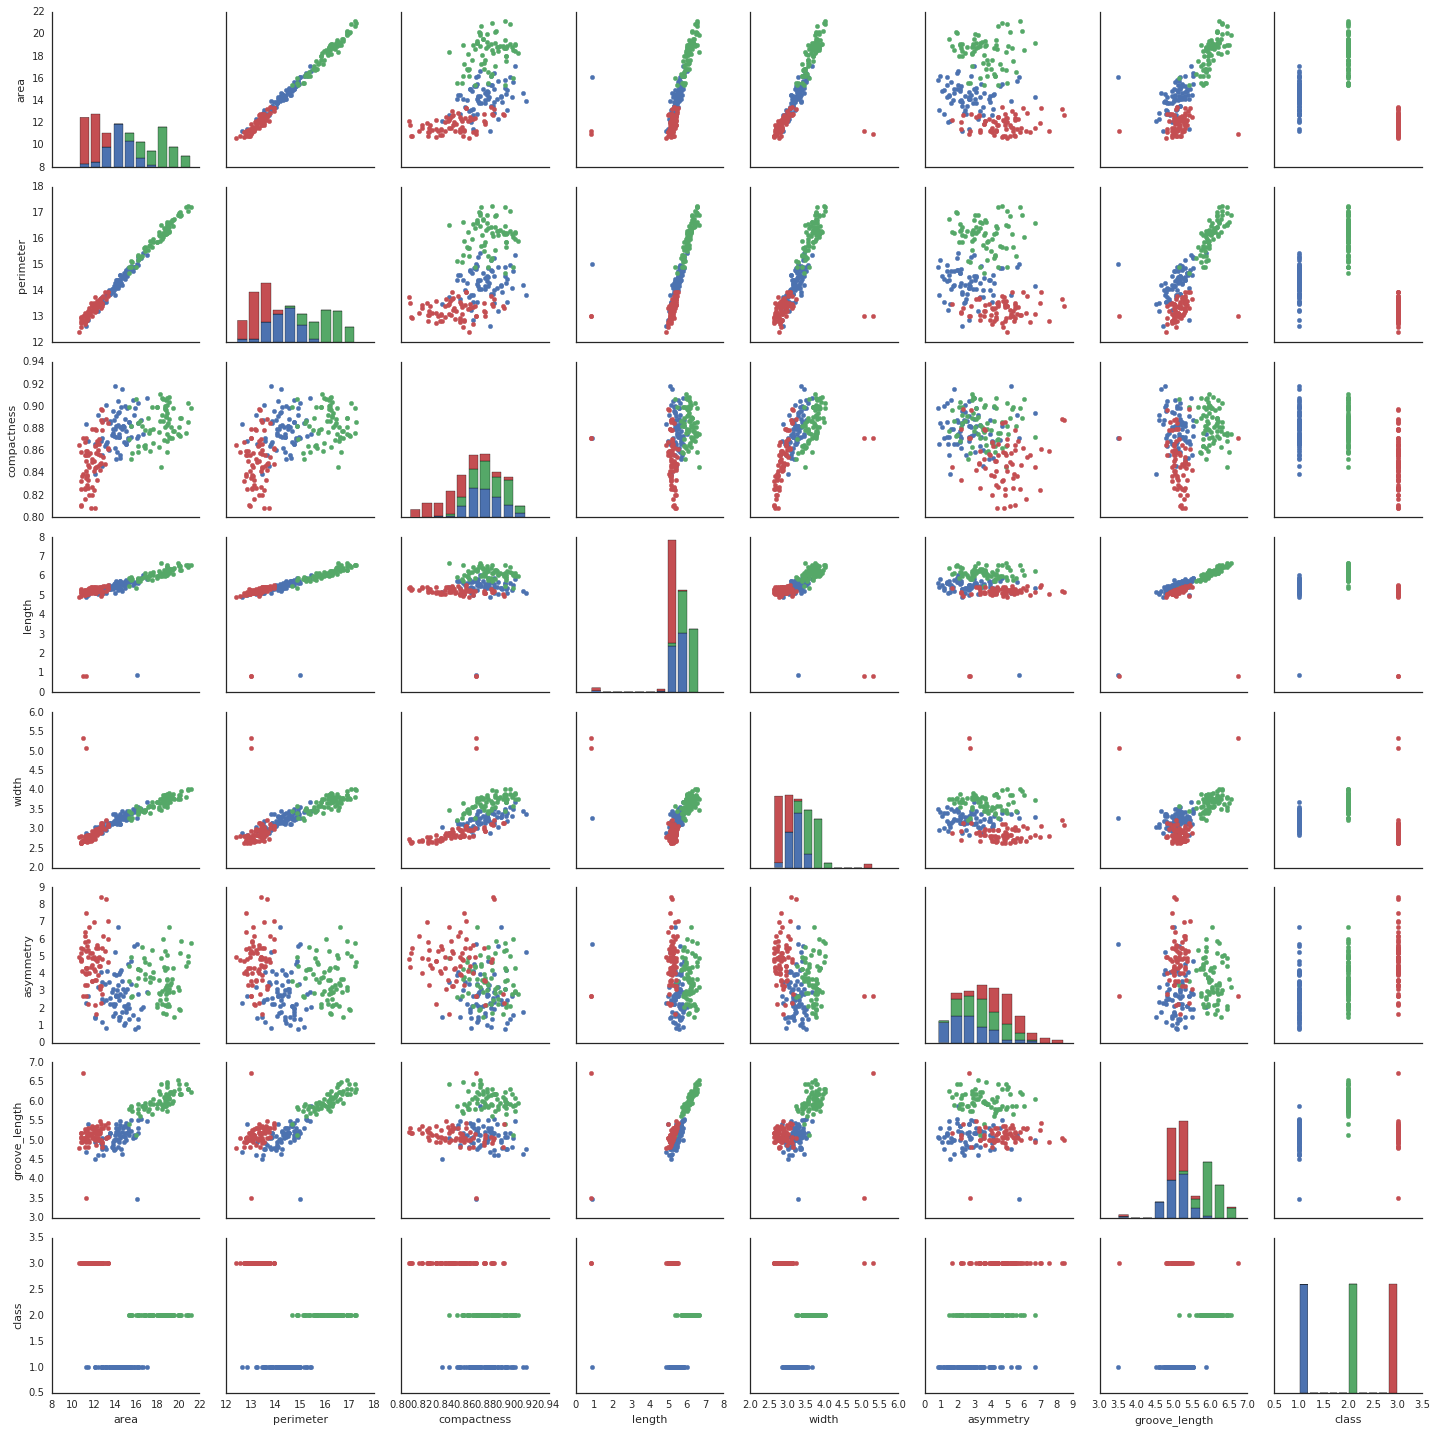

In [109]:
# Visualize dataset with scatterplot matrix
%matplotlib inline

g = sns.PairGrid(data_clean, hue="class")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### K Means (3 clusters)

In [110]:
#train a k-nearest neighbor algorithm
fit = KMeans(n_clusters=3).fit(X_scaled)
fit.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0], dtype=int32)

In [112]:
#remake labels so that they properly matchup with the classes 
labels = fit.labels_[:]
for index,val in enumerate(labels):
    if val == 2:
        labels[index] = 1
    elif val == 1:
        labels[index] = 3
    else:
        labels[index] = 2

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 3], dtype=int32)

In [113]:
conf_mat = np.zeros((3,3))

for i,val in enumerate(y):
    conf_mat[val-1,labels[i]-1] += 1

#true vs. predicted
print(pd.DataFrame(conf_mat))

      0     1     2
0  64.0   2.0   4.0
1   4.0  66.0   0.0
2  10.0   0.0  60.0


## Data Tasks

1. Read in file
    - Different types of separators (',',' ', '\t', '\s', etc.)
    - Specify whether there is a header or not
    - Name different columns
    - Editting values to matchup with columns
    
1. Handle missing values (ex. ?, NA, etc.)
    - remove these examples?
    - replace missing values with the mean or 0

1. Select columns for the regression tasks
    - Select columns I want to use as predictors
    - Select which column I am looking to target and predict

1. Transform columns or variables
    - scaling columns so that their means and variances are equal
    
1. Cluster using K-Means
    - specify number of clusters
    - specify initial cluster locations
    - clustering type (avg, max, min, etc.)

1. Perform diagnostics on the model
    - See cluster centers
    - confusion matrix
    
1. Visualizations
    - Visualize dataset as a whole (scatter plot matrix)
    - See diagnostic plots (t-squared, ccc)